**Createing Json prediction results and prediction masks**

The following is a small tutorial on how to generate prediction annotation files using a trained U-Net model. This file also shows how to create a color image masks from the generated annotation file. 


First, import and setup U-Net

In [4]:
from models.unet import UNet
import torch

In [5]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/yeqiu/anaconda3/envs/cvision/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
net = UNet(n_channels=3, n_classes=4)

Load the trained model from path

In [7]:
checkpoint_path = "checkpoints/unet-augment-512-chp-35.pth"

In [8]:
net.to(device=device)

UNet(
  (first_layer): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05

In [9]:
net.load_state_dict(torch.load(checkpoint_path, map_location=device))

<All keys matched successfully>

For this example, use one of the tiles the was reserved for testing (no masks given)

In [10]:
image_path = "data/raw/7_6.png"

import prediction converter and mask generator

In [11]:
from predict import prediction_to_json

In [12]:
from data_utils.common import create_mask

In [13]:
annotations = prediction_to_json(image_path=image_path, chkp_path=checkpoint_path, net=net)

In [15]:
type(annotations)

dict

In [16]:
# convert the annotations to an image mask

In [17]:
height, width = annotations['height'], annotations['width']

In [18]:
print(f"{height}, {width}")

1728, 1571


In [19]:
import numpy as np

In [21]:
mask = np.ones((height, width, 3), dtype=np.uint8) * 255

In [22]:
# define a color dictionary that corresponds to labels

In [24]:
from data_utils import colors

In [25]:
hex_to_colors = {
        "#ff0000": colors.hex_to_rgb('#ff0000'),
        "#0037ff": colors.hex_to_rgb('#0037ff'),
        '#f900ff': colors.hex_to_rgb('#f900ff')
    }

In [26]:
mask = create_mask(mask, label_data=annotations['labels'], pixel_labels=hex_to_colors)

In [28]:
import matplotlib

In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

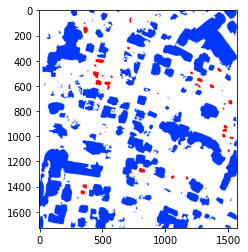

In [31]:
plt.imshow(mask)

In [32]:
from PIL import Image

In [33]:
image = np.array(Image.open(image_path))

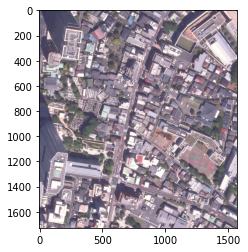

In [34]:
plt.imshow(image)